In [1]:
import tensorflow as tf # tensorflow 2.10
import numpy as np
import matplotlib.pyplot as plt
from load_data2 import evals_parser, evals_square_parser, evecs_parser

2022-10-18 13:39:03.615990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 13:39:03.817432: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-18 13:39:03.817449: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-18 13:39:03.848188: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 13:39:04.939609: W tensorflow/stream_executor/platform/de

In [2]:
# Importing the datasets
batch_size = 16
tfile = "/home/gaspard/ETHZ/Master_Arbeit/acoupipe_datasets/training_1-100000_csmtriu_1src_he4.0625-1393.4375Hz_ds1-v001_13-Sep-2022.tfrecord"
dataset = tf.data.TFRecordDataset(filenames=[tfile])

evals_dataset = dataset.map(evals_parser)
evals_dataset = evals_dataset.shuffle(buffer_size=10).batch(batch_size)

evals_square_dataset = dataset.map(evals_square_parser)
evals_square_dataset = evals_square_dataset.shuffle(buffer_size=10).batch(batch_size)

evecs_dataset = dataset.map(evecs_parser)
evecs_dataset = evecs_dataset.shuffle(buffer_size=10).batch(batch_size)

2022-10-18 13:39:07.148922: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-18 13:39:07.149004: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-18 13:39:07.149039: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gaspard-HP-ZBook-15u-G2): /proc/driver/nvidia/version does not exist
2022-10-18 13:39:07.149552: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### WGANGP to generate eigenvalues

In [3]:
from evals_WGANGP2 import evals_WGANGP

# Creating GAN
evals_wgangp = evals_WGANGP()

-=-=- EPOCH 1 -=-=-
>loss: [c=14.435][g=-0.327]
>accuracy: [c=0.500][g=0.438]

-=-=- EPOCH 2 -=-=-
>loss: [c=2.104][g=-0.157]
>accuracy: [c=0.500][g=0.438]

-=-=- EPOCH 3 -=-=-
>loss: [c=2.861][g=-0.421]
>accuracy: [c=0.500][g=0.500]

-=-=- EPOCH 4 -=-=-
>loss: [c=9.101][g=0.250]
>accuracy: [c=0.500][g=0.562]

-=-=- EPOCH 5 -=-=-
>loss: [c=2.741][g=-0.237]
>accuracy: [c=0.500][g=0.312]

-=-=- EPOCH 6 -=-=-
>loss: [c=4.076][g=-0.176]
>accuracy: [c=0.500][g=0.438]

-=-=- EPOCH 7 -=-=-
>loss: [c=0.975][g=-0.302]
>accuracy: [c=0.500][g=0.312]

-=-=- EPOCH 8 -=-=-
>loss: [c=8.430][g=-0.238]
>accuracy: [c=0.500][g=0.438]

-=-=- EPOCH 9 -=-=-
>loss: [c=2.825][g=0.121]
>accuracy: [c=0.500][g=0.625]

-=-=- EPOCH 10 -=-=-
>loss: [c=3.357][g=-0.047]
>accuracy: [c=0.500][g=0.375]



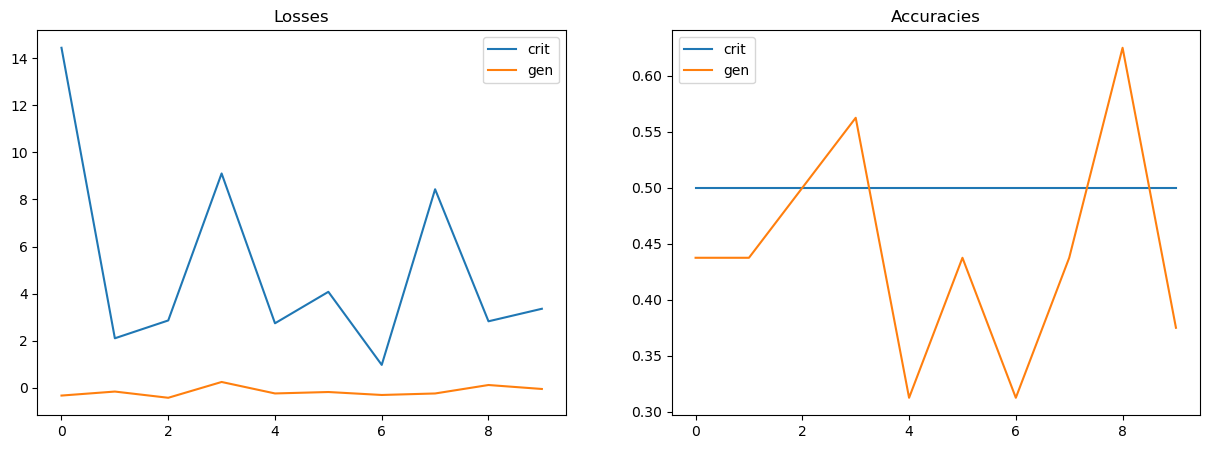

In [4]:
evals_wgangp.train(evals_dataset=evals_square_dataset, n_epoch=10)

1/1 [==============================] - 0s 144ms/step
tf.Tensor(-1.1746306, shape=(), dtype=float32)
1/1 [==============================] - 0s 23ms/step
tf.Tensor(-1.4326352, shape=(), dtype=float32)
1/1 [==============================] - 0s 22ms/step
tf.Tensor(-0.9879911, shape=(), dtype=float32)
1/1 [==============================] - 0s 56ms/step
tf.Tensor(-1.6528046, shape=(), dtype=float32)
1/1 [==============================] - 0s 47ms/step
tf.Tensor(-0.74124706, shape=(), dtype=float32)
1/1 [==============================] - 0s 28ms/step
tf.Tensor(-0.52787095, shape=(), dtype=float32)
1/1 [==============================] - 0s 28ms/step
tf.Tensor(-1.971512, shape=(), dtype=float32)
1/1 [==============================] - 0s 35ms/step
tf.Tensor(-1.2356399, shape=(), dtype=float32)
1/1 [==============================] - 0s 34ms/step
tf.Tensor(-1.2465492, shape=(), dtype=float32)
1/1 [==============================] - 0s 92ms/step
tf.Tensor(-0.36855242, shape=(), dtype=float32)
1/1 [==

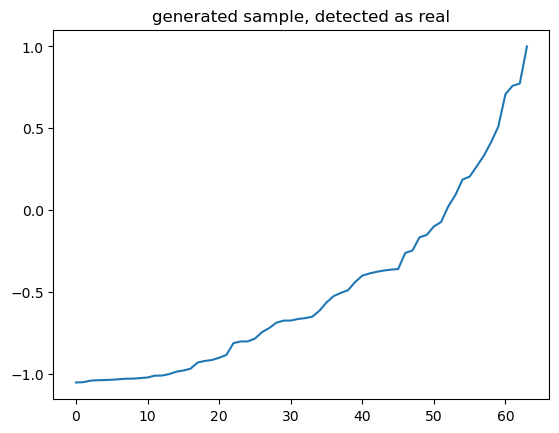

In [5]:
import numpy as np
import matplotlib.pyplot as plt

is_real, sample = evals_wgangp.generate_evals()
sample = np.sort(np.array(sample[0, :, :, 0]).flatten()) # convert sample from (1,8,8,1) to (64,)


if is_real:
    plt.title("generated sample, detected as real")
    plt.plot(sample)
else:
    plt.title("generated sample, detected as fake")
    plt.plot(sample)    

### WGANGP to generate eigenvectors

In [6]:
from evecs_WGANGP2 import evecs_WGANGP

# Creating GAN
evecs_wgangp = evecs_WGANGP()

-=-=- EPOCH 1 -=-=-
>loss: [c=117.175][g=0.890]
>accuracy: [c=0.500][g=0.875]

-=-=- EPOCH 2 -=-=-
>loss: [c=94.996][g=0.895]
>accuracy: [c=0.500][g=0.750]

-=-=- EPOCH 3 -=-=-
>loss: [c=83.261][g=0.570]
>accuracy: [c=0.500][g=0.812]



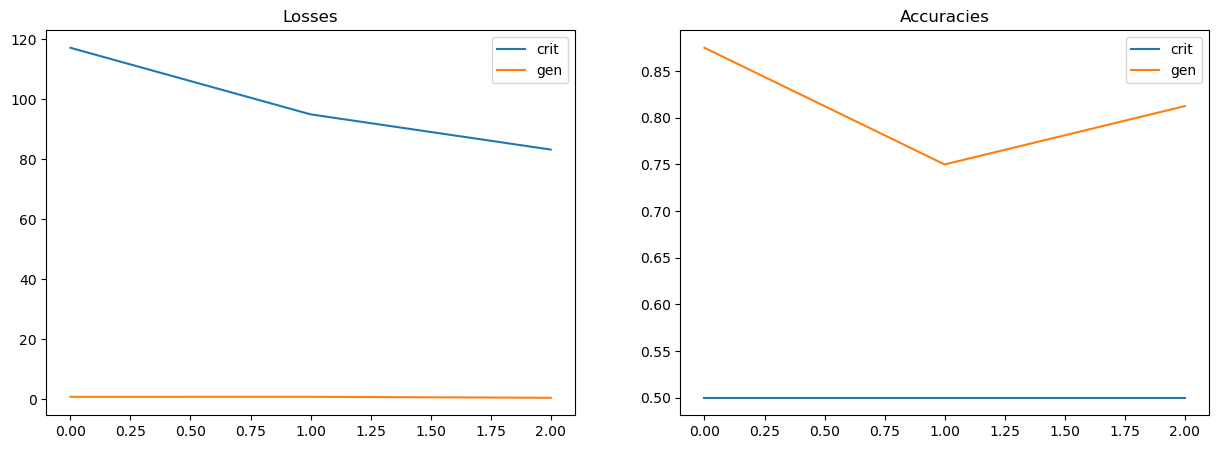

In [7]:
evecs_wgangp.train(evecs_dataset=evecs_dataset, n_epoch=3)

1/1 [==============================] - 0s 156ms/step
real eigenvalues found
(1, 64, 64, 2)


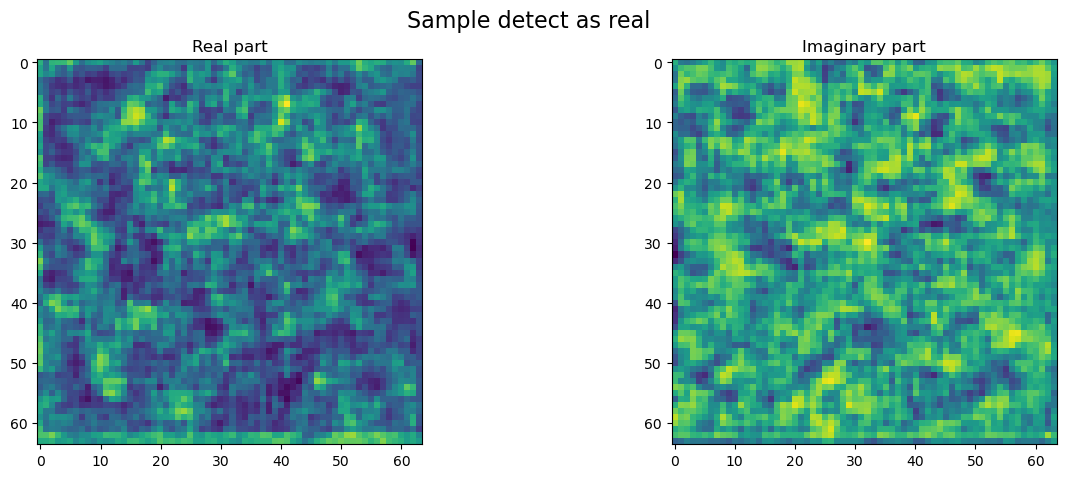

In [8]:
import numpy as np
import matplotlib.pyplot as plt

is_real, sample = evecs_wgangp.generate_evecs()
print(sample.shape)

sample_real = sample[0, :, :, 0] # get real part from sample
sample_imag = sample[0, :, :, 1] # get imaginary part from sample

if is_real:

    fig = plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.title("Real part")
    plt.imshow(sample_real)

    plt.subplot(1,2,2)
    plt.title("Imaginary part")
    plt.imshow(sample_imag)

    fig.suptitle('Sample detect as real', fontsize=16)

    
else:
    fig = plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.title("Real part")
    plt.imshow(sample_real)

    plt.subplot(1,2,2)
    plt.title("Imaginary part")
    plt.imshow(sample_imag)

    fig.suptitle('Sample detect as fake', fontsize=16)


### Check validity of obtained data

- Use both WGAN-GPs to generate eigenvalues and eigenvectors
- Use the eigendecomposition formula to recreate (scaled) CSM
- Use obtained CSM to perform beamforming

In [9]:
from beamforming import beamform, get_csm

evals_are_real, generated_evals = evals_wgangp.generate_evals()
evecs_are_real, generated_evecs = evecs_wgangp.generate_evecs()

#if evals_are_real and evecs_are_real:
    
# reshape data
evals_vec_numpy = np.sort(np.array(generated_evals[0, :, :, 0]).flatten())
evals_vec = tf.convert_to_tensor(evals_vec_numpy)
evecs_real = generated_evecs[0, :, :, 0] # get real part from sample
evecs_imag = generated_evecs[0, :, :, 1] # get imaginary part from sample

csm = get_csm(evecs_real, evecs_imag, evals_vec)

beamform(csm)



1/1 [==============================] - 0s 24ms/step
tf.Tensor(-0.5839811, shape=(), dtype=float32)
1/1 [==============================] - 0s 25ms/step
tf.Tensor(-0.7626231, shape=(), dtype=float32)
1/1 [==============================] - 0s 60ms/step
tf.Tensor(-1.66495, shape=(), dtype=float32)
1/1 [==============================] - 0s 37ms/step
tf.Tensor(-1.9809982, shape=(), dtype=float32)
1/1 [==============================] - 0s 42ms/step
tf.Tensor(-2.455195, shape=(), dtype=float32)
1/1 [==============================] - 0s 33ms/step
tf.Tensor(-2.0223987, shape=(), dtype=float32)
1/1 [==============================] - 0s 31ms/step
tf.Tensor(0.40710473, shape=(), dtype=float32)
real eigenvalues found
1/1 [==============================] - 0s 56ms/step


Exception occurred in traits notification handler for object: <acoular.microphones.MicGeom object at 0x7f369989cef0>, trait: basename, old value: None, new value: tub_vogel64_ap1
Traceback (most recent call last):
  File "/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/site-packages/traits/trait_notifiers.py", line 524, in _dispatch_change_event
    self.dispatch(handler, *args)
  File "/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/site-packages/traits/trait_notifiers.py", line 486, in dispatch
    handler(*args)
  File "/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/site-packages/acoular/microphones.py", line 117, in import_mpos
    doc = xml.dom.minidom.parse(self.from_file)
  File "/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/xml/dom/minidom.py", line 1988, in parse
    return expatbuilder.parse(file)
  File "/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/xml/dom/expatbuilder.py", line 910, in parse
    with open(file, 'rb') a

real eigenvalues found
(1, 64, 64)


TraitError: The '_csm' trait of a PowerSpectraImport instance must be an array, but a value of <tf.Tensor: shape=(1, 64, 64), dtype=complex64, numpy=
array([[[-0.53400016+0.0000000e+00j, -0.33477974+1.5915102e-01j,
         -0.12638956+9.5262073e-02j, ..., -0.01463669+3.9214835e-02j,
         -0.24592128-5.9283175e-02j, -0.00148547-8.2313359e-02j],
        [-0.33477977-1.5915102e-01j, -0.7953959 +0.0000000e+00j,
         -0.5373933 +9.4084144e-02j, ..., -0.2792988 +5.8661208e-02j,
         -0.4644815 -3.8527918e-01j,  0.19060612-2.1450248e-01j],
        [-0.12638955-9.5262066e-02j, -0.5373933 -9.4084159e-02j,
         -0.9059374 +0.0000000e+00j, ..., -0.2977107 +1.8142170e-01j,
         -0.41548672-4.3044448e-01j,  0.2658856 -3.0066827e-01j],
        ...,
        [-0.01463668-3.9214835e-02j, -0.2792988 -5.8661208e-02j,
         -0.2977107 -1.8142173e-01j, ..., -0.7645421 +0.0000000e+00j,
         -0.44272032-4.5225328e-01j,  0.07549909-1.3181376e-01j],
        [-0.24592127+5.9283175e-02j, -0.4644815 +3.8527918e-01j,
         -0.41548672+4.3044448e-01j, ..., -0.44272032+4.5225328e-01j,
         -0.88229966+2.9802322e-08j, -0.15344396-3.8315782e-01j],
        [-0.00148547+8.2313359e-02j,  0.19060612+2.1450250e-01j,
          0.2658856 +3.0066827e-01j, ...,  0.07549908+1.3181376e-01j,
         -0.15344395+3.8315785e-01j, -0.44486043+0.0000000e+00j]]],
      dtype=complex64)> <class 'tensorflow.python.framework.ops.EagerTensor'> was specified.

### Below: Previous atempts, to discard
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv

### GRIDSEARCH: GAN to generate eigenvalues

In [ ]:
from tensorflow import summary
from evals_GAN2 import evals_GAN

lr_list = [5e-7, 1e-7, 5e-8, 1e-8, 5e-9, 1e-9]
#lr_list = [1e-10, 1e-11, 1e-12]
beta_1_list = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

for lr in lr_list:
    for beta_1 in beta_1_list:
        
        print(f"lr={lr}, beta_1={beta_1}")
        
        evals_gan = evals_GAN(lr, beta_1, summary=False) # Creating GAN
        evals_gan.train(evals_dataset=evals_dataset, n_epoch=500, print_epoch=False) # Training the GAN

        # Plotting sampled eigenvalues 
        is_real, sample = evals_gan.get_evals()
        
        fig = plt.figure()

        if is_real:
            plt.title(f"generated sample, detected as real, lr={lr}, b={beta_1}")
            plt.plot(np.sort(np.array(sample)[0]))
        else:
            plt.title(f"generated sample, detected as fake, lr={lr}, b={beta_1}")
            plt.plot(np.sort(np.array(sample)[0]))

In [ ]:
# Grid search 2
#from tensorflow import summary
from evals_GAN2 import evals_GAN

lr_list = [1e-9, 1e-9, 1e-8, 1e-7, 1e-7]
beta_1_list = [0.5, 0.7, 0.2, 0.1, 0.9]

n_epoch=250

for lr, beta_1 in zip(lr_list, beta_1_list):
    
    print(f"lr={lr}, beta_1={beta_1}")
    
    evals_gan = evals_GAN(lr, beta_1, summary=False) # Creating GAN
    evals_gan.train(evals_dataset=evals_dataset, n_epoch=n_epoch, print_epoch=False) # Training the GAN

    # Plotting sampled eigenvalues 
    is_real, sample = evals_gan.get_evals()
    
    fig = plt.figure()

    if is_real:
        plt.title(f"generated sample, detected as real, lr={lr}, b={beta_1}")
        plt.plot(np.sort(np.array(sample)[0]))
    else:
        plt.title(f"generated sample, detected as fake, lr={lr}, b={beta_1}")
        plt.plot(np.sort(np.array(sample)[0]))
    
# runtime   : 1000 epochs  : approx 5min30
# runtime   : 250 epochs   : approx 1min30

### GAN to generate eigenvalues

In [ ]:
from evals_GAN2 import evals_GAN

# Creating GAN
evals_gan = evals_GAN()

# Training the GAN
evals_gan.train(evals_dataset=evals_dataset, n_epoch=100)

In [ ]:
# Plotting sampled eigenvalues 
is_real, sample = evals_gan.get_evals()

if is_real:
    plt.title("generated sample, detected as real")
    plt.plot(np.sort(np.array(sample)[0]))
else:
    plt.title("generated sample, detected as fake")
    plt.plot(np.sort(np.array(sample)[0]))

### DCGAN to generate eigenvalues

In [ ]:
from evals_DCGAN2 import evals_DCGAN

# Creating GAN
evals_dcgan = evals_DCGAN()

# Training the GAN
evals_dcgan.train(evals_dataset=evals_dataset, n_epoch=300)

In [ ]:
# Plotting sampled eigenvalues 
is_real, sample = evals_dcgan.get_evals()

if is_real:
    plt.title("generated sample, detected as real")
    plt.plot(np.sort(np.array(sample)[0]))
else:
    plt.title("generated sample, detected as fake")
    plt.plot(np.sort(np.array(sample)[0]))

### WGAN to generate eigenvectors 

In [ ]:
from evecs_WGAN2 import evecs_WGAN

# Creating WGAN
evecs_wgan = evecs_WGAN()

In [ ]:
evecs_wgan.train(evecs_dataset=evecs_dataset, n_epoch=1000)

In [ ]:
sample = evecs_wgan.get_evecs()